# Homework : 03
## Koidala Surya Prakash
### EE18BTECH11026

In [1]:
## imports
import time ## to understand the time complexity of iterative and matrix approach

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cmath
from scipy import signal
PI = np.pi ## denoting common constants..                            
exp = np.e                                  

# Q1. 2D-DFT

In [160]:
### code for Q1


class Q1:
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
        
    
   
    def __init__ (self, path, display = False, title = None):
        self.path = path
        self.I = cv2.imread(path,cv2.IMREAD_GRAYSCALE) ## Reading images..
        self.N = self.I.shape[0]
        if(display): ## Displaying I
            self.disp_img(self.I, title)
            
    #### Question 1.a --> iterative approach
    ################################################################################################
    def find_DFT_iter(self, I): ## 
        
        self.J = I
        N = self.J.shape[0]
        self.DFT_iter = np.zeros((N,N), dtype = complex)
        
        for u in range(N):
            for v in range(N):
                temp = complex(0,0)
                
                for i in range(N):
                    for j in range(N):
                        phase = -1*(2*PI)*(u*i + v*j)/N
                        temp += self.J[i][j] * (cmath.rect(1, phase))
                
                self.DFT_iter[u][v] =  temp
        return self.DFT_iter
        
        
    def find_IDFT_iter(self,I):

        self.J = I
        N = self.J.shape[0]
        self.IDFT_iter = np.zeros((N,N), dtype = complex)
        
        for i in range(N):
            for j in range(N):
                temp = complex(0,0)
                
                for u in range(N):
                    for v in range(N):
                        phase = (2*PI)*(u*i + v*j)/N
                        temp += self.J[u][v] * (cmath.rect(1, phase)) * (1/(N)**2 )
                
                self.IDFT_iter[i][j] = temp
        
        self.IDFT_iter = np.round(abs(self.IDFT_iter))
        self.IDFT_iter = np.array(self.IDFT_iter, dtype = np.uint8)
        
        return self.IDFT_iter
    ################################################################################################
    
    
        
    #### Question 1.b --> Matrix approach 
    ##########################################################################################
    def find_DFT(self, I): ### funct to compute DFT using matrix approach
        
        self.J = I.copy()
        N = self.J.shape[0]
        self.DFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        self.DFT = W@self.J@W
        return self.DFT
    
    
    def find_IDFT(self, I): ### finding IDFT using matrix approach
        self.J = I
        N = self.J.shape[0]
        self.IDFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        W_inv = (1/N) * np.conjugate(W)
        
        self.IDFT = W_inv@self.J@W_inv
        self.IDFT = np.round(abs(self.IDFT))
        self.IDFT = np.array(self.IDFT, dtype = np.uint8)
        
        return self.IDFT
    ##########################################################################################
    
    
        
    ################################################################################   
    #### Operations ... DFT visualisations and reconstructions ...
    ################################################################################
    
    ### basic magnitude
    def magnitude(self, DFT, display = False, title = None):
        self.DFT_mag = np.abs(DFT)
        
        if(display):
            self.disp_img(self.DFT_mag, title)
        return self.DFT_mag
    
    ### utilities 
    ###  magnitude with log compression
    def log_compressed_magnitude(self, DFT, display = False, title = None):
        
        ## utility function...
        def log_compressed_FSCS(I):
            I = np.log2(1+I)
            mini,maxi = np.amin(I), np.amax(I)
            J = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255) for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)
            return J
        
        self.DFT_mag = np.abs(DFT)
        self.DFT_mag_log_compressed = log_compressed_FSCS(self.DFT_mag)
        
        if(display):
            self.disp_img(self.DFT_mag_log_compressed, title)
        return self.DFT_mag_log_compressed
    
    
    ### displaying phase of the DFT : also performing FSCS to map [-pi , pi]--> [0,255]
    def phase(self, DFT, display = False, title = None): ### applying FSCS to phase [-pi , pi]--> [0,255]
        I = np.angle(DFT,deg=False)  ### raw phase in radians
        mini,maxi = np.amin(I), np.amax(I)
        self.phase = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255) for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)

        if(display):
            self.disp_img(self.phase, title)
        return self.phase, I ## returns FSCS phase --> lies in [0,255] and raw phas--> [-pi, pi]
    
    ################################################################################
    
    # For 1.2
    ## transforming I to get centered DFT
    def center_I_transform(self, I): ### Transfrorming I to get a centered DFT
        self.I_cap = np.array([[  ((-1)**(i+j)) * I[i][j]  for j in range(I.shape[1])] for i in range(I.shape[0])])
        return self.I_cap
    
    # For 1.4
    #### Constructing DFT from mag and phase ## utility for q1.d
    def dft_from_mag_and_phase(self,mag, phase):
        N = mag.shape[0]
        DFT = np.array( [[ cmath.rect(mag[i][j],phase[i][j]) for j in range(N)] for i in range(N)] ,dtype = complex)
        return DFT
        

## DFT/IDFT using iterative approach 
### Since this takes a lot of time , analysis is done on a (28*28) image on MNIST data. 
#### Image Link : https://www.kaggle.com/scolianni/mnistasjpg

### a), Display image,  DFT mag , phase

##### raw magnitude is displayed along with the log compressed version
##### phase has been scaled from [-pi, pi]--> [0,255]

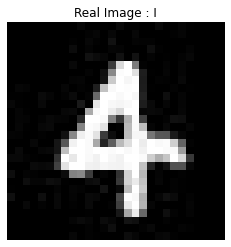

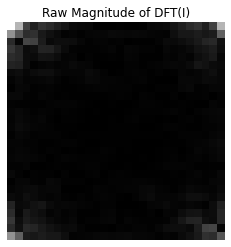

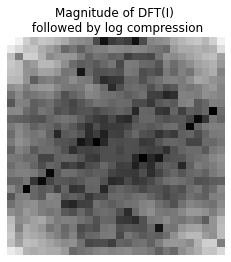

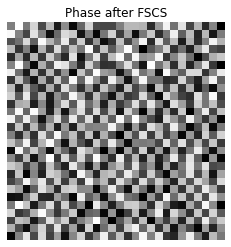

In [161]:
q1 = Q1(path = 'mnist.jpg', display = True, title = "Real Image : I")
DFT_img = q1.find_DFT_iter(q1.I)

_ = q1.magnitude(DFT_img, display = True, title = "Raw Magnitude of DFT(I)")
_ = q1.log_compressed_magnitude(DFT_img, display = True, title = "Magnitude of DFT(I) \n followed by log compression")
_ = q1.phase(DFT_img, display=True, title = "Phase after FSCS")

### b) A centered DFT

### Applied the said transformation and computed DFT

#### We can see the bright spot denoting the DC component on the center

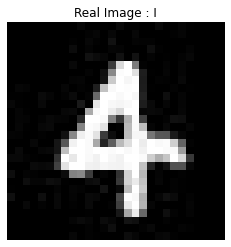

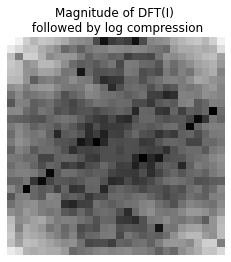

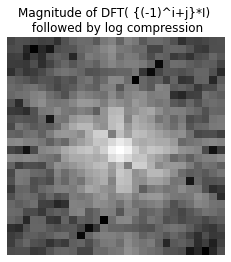

In [162]:
q1 = Q1(path = 'mnist.jpg', display = True, title = "Real Image : I")
DFT_I = q1.find_DFT_iter(q1.I) ### Actual DFT
_ = q1.log_compressed_magnitude(DFT_I, display = True, title = "Magnitude of DFT(I) \n followed by log compression")

I_cap = q1.center_I_transform(q1.I)
DFT_I_cap = q1.find_DFT_iter(I_cap) ## Centered DFT
_ = q1.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT( {(-1)^i+j}*I) \n followed by log compression")


###  c) Verifying IDFT[DFT[I] ] = I

#### Shown by displaying the difference image which is black

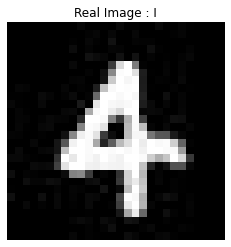

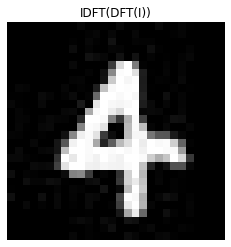

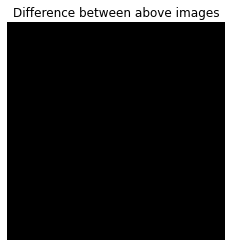

In [163]:
q1 = Q1(path = 'mnist.jpg', display = True, title = "Real Image : I")

DFT_img = q1.find_DFT_iter(q1.I)
IDFT_DFT_img = q1.find_IDFT_iter(DFT_img)

q1.disp_img(IDFT_DFT_img, title = 'IDFT(DFT(I))')

#### showing the difference between I & IDFT(DFT(I)) = 0
q1.disp_img( q1.I - IDFT_DFT_img, title =  'Difference between above images'  )


### d) Importance of phase

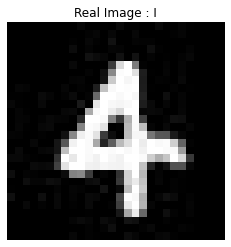

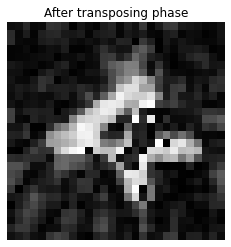

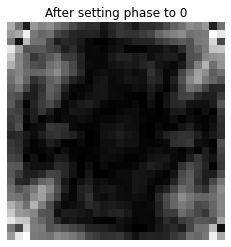

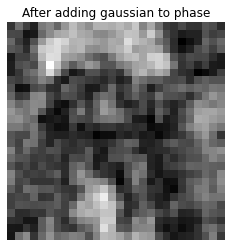

In [164]:
### transposing the phase..

q1 = Q1(path = 'mnist.jpg', display = True, title = "Real Image : I")
DFT_I = q1.find_DFT_iter(q1.I) ### Actual DFT


###  decomposing into mag and phase
mag = q1.magnitude(DFT_I)
_,phase = q1.phase(DFT_I)


###############################################
# 1. Transposing the phase 
###############################################
phase1 = np.transpose(phase)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase1)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After transposing phase')



###############################################
# 2. Setting phase to 0
###############################################
phase2 = np.zeros(phase.shape)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase2)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After setting phase to 0')


###############################################
# 3. Adding Gaussian noise : Added noise with var and mean of 45
###############################################
phase3 = phase + np.random.normal(45,45,size = phase.shape)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase3)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After adding gaussian to phase')



## DFT/IDFT using Matrix approach
### Not turning in results for 3 images as it might take more space . Do consider renaming your image of choice.



In [171]:
### Inorder to rename : 

#q1 = Q1(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")
#q1 = Q1(path = 'misc/4.1.02.tiff', display = True, title = "Real Image : I")
#q1 = Q1(path = 'misc/4.1.03.tiff', display = True, title = "Real Image : I")

### a), Display image,  DFT mag , phase

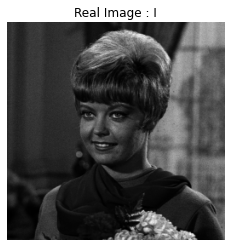

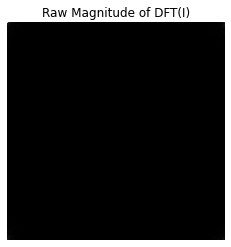

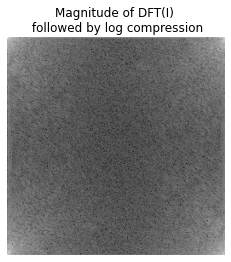

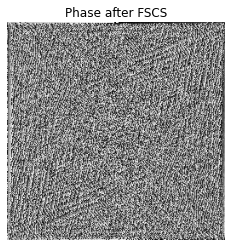

In [172]:
q1 = Q1(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")
DFT_img = q1.find_DFT(q1.I)

_ = q1.magnitude(DFT_img, display = True, title = "Raw Magnitude of DFT(I)")
_ = q1.log_compressed_magnitude(DFT_img, display = True, title = "Magnitude of DFT(I) \n followed by log compression")
_ = q1.phase(DFT_img, display=True, title = "Phase after FSCS")

### b) A centered DFT

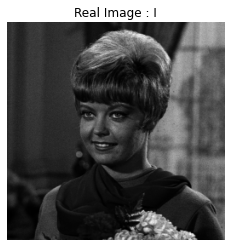

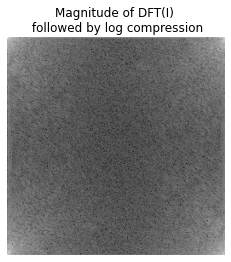

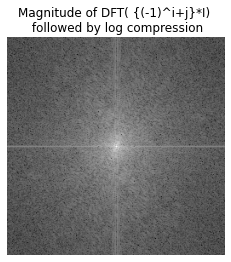

In [173]:
q1 = Q1(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")
DFT_I = q1.find_DFT(q1.I) ### Actual DFT
_ = q1.log_compressed_magnitude(DFT_I, display = True, title = "Magnitude of DFT(I) \n followed by log compression")

I_cap = q1.center_I_transform(q1.I)
DFT_I_cap = q1.find_DFT(I_cap) ## Centered DFT
_ = q1.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT( {(-1)^i+j}*I) \n followed by log compression")


###  c) Verifying IDFT[DFT[I] ] = I

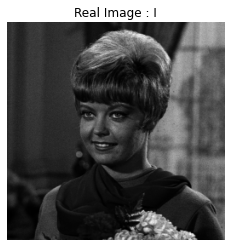

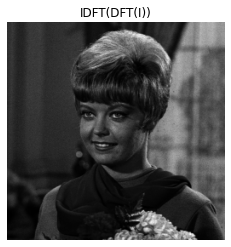

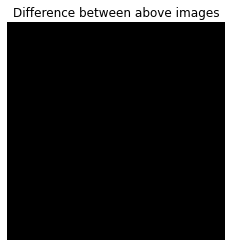

In [174]:
q1 = Q1(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")

DFT_img = q1.find_DFT(q1.I)
IDFT_DFT_img = q1.find_IDFT(DFT_img)

q1.disp_img(IDFT_DFT_img, title = 'IDFT(DFT(I))')

#### showing the difference between I & IDFT(DFT(I)) = 0
q1.disp_img( q1.I - IDFT_DFT_img, title =  'Difference between above images'  )


### d) Importance of phase

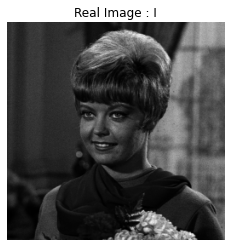

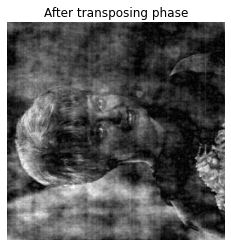

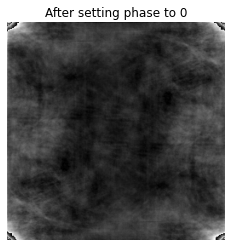

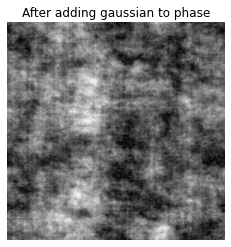

In [175]:
### transposing the phase..

q1 = Q1(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")
DFT_I = q1.find_DFT(q1.I) ### Actual DFT


###  decomposing into mag and phase
mag = q1.magnitude(DFT_I)
_,phase = q1.phase(DFT_I)


###############################################
# 1. Transposing the phase 
###############################################
phase1 = np.transpose(phase)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase1)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After transposing phase')



###############################################
# 2. Setting phase to 0
###############################################
phase2 = np.zeros(phase.shape)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase2)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After setting phase to 0')


###############################################
# 3. Adding Gaussian noise
###############################################
phase3 = phase + np.random.normal(45,45,size = phase.shape)
DFT_reconstructed = q1.dft_from_mag_and_phase(mag, phase3)
IDFT_DFT_img = q1.find_IDFT(DFT_reconstructed)
q1.disp_img(IDFT_DFT_img, title = 'After adding gaussian to phase')



# Q2 Periodic convolution

In [176]:
### Code for Q2
class Q2(Q1): ### inheriting all the methods from Q1
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
        
    
   
    def __init__ (self, path, display = False, title = None):
        self.path = path
        self.I = cv2.imread(path,cv2.IMREAD_GRAYSCALE) ## Reading images..
        self.N = self.I.shape[0]
        if(display): ## Displaying I
            self.disp_img(self.I, title)
            
            
    ############################ Code 2.1 ##########################3
    ###  An iterative approach for circular conv
    def circular_conv(self,I,F):
        J = np.zeros((I.shape))
        M,N = J.shape
        
        for i in range(M):
            for j in range(N):
                temp = 0
                for p in range(F.shape[0]):
                    for q in range(F.shape[1]):
                        temp+= I[(i-p)%M][ (j-q)%N ] * F[p][q]
                J[i][j] = np.round(temp)
        return J
    ############################ Code 2.2 ##########################33#
    ### Padding and performing linear conv
    def zero_padding(self, I, target_shape):
        J = np.zeros(target_shape)
        ### padding zeros at the bottom right 
        J[0:I.shape[0],0:I.shape[1]] = I[0:I.shape[0],0:I.shape[1]]
        return J
    
    def linear_conv_using_circular_conv(self,I, F):
        I_padded = self.zero_padding(I, (I.shape[0] + F.shape[0] -1, I.shape[1] + F.shape[1] -1))
        ### Target shape... m+n-1 for linear conv
        J = self.circular_conv(I_padded, F) ## Using the circular conv operation
        J_crop = J[0:I.shape[0]][0:I.shape[1]]
        return J, J_crop
        
        
    ########################  Code 2.3 ###############################
    ### Padded and computing IDFT( DFT(I). DFT(F))
    def linear_conv_with_DFT(self, I, F):
        N,M = I.shape
        P,P  = F.shape
        
        #### Padding both images..
        I = self.zero_padding(I,(N+P-1,M+P-1))
        F = self.zero_padding(F,(N+P-1,M+P-1))
        
        I_DFT = self.find_DFT(I)
        F_DFT = self.find_DFT(F)
        
        J = np.multiply(I_DFT, F_DFT, dtype= complex)
        
        J_IDFT = self.find_IDFT(J)
        J_cropped = J_IDFT[0:I.shape[0]][0:I.shape[1]]
        
        return J_IDFT, J_cropped
        

### 2.1 Circlular convolution..

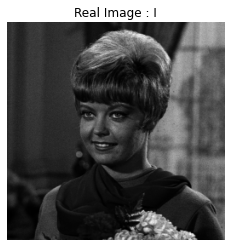

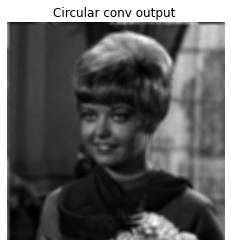

In [178]:
q2 = Q2(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")

### Definding the average filer:
f = 5
F = np.ones((f,f))/(f**2)

### Implementing circular conv
Image_avg = q2.circular_conv(q2.I, F)

q2.disp_img(Image_avg, title = "Circular conv output ")

### 2.2 Linear convoluted image from circular convolution...

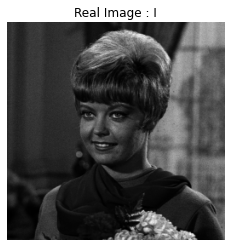

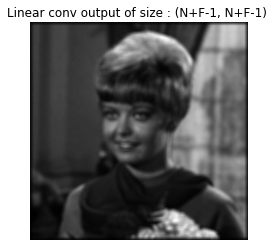

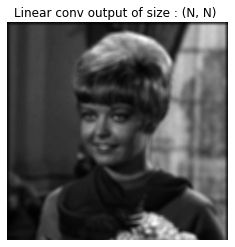

In [114]:
q2 = Q2(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")

### Definding the average filer: with 5*5
f = 5
F = np.ones((f,f))/(f**2)

### Implementing linear conv
Image_avg_conv,Image_avg_conv_cropped = q2.linear_conv_using_circular_conv(q2.I, F)
q2.disp_img(Image_avg_conv, title = "Linear conv output of size : (N+F-1, N+F-1) ")
q2.disp_img(Image_avg_conv_cropped, title = "Linear conv output of size : (N, N) ")


### 2.3 Linear conv using DFT

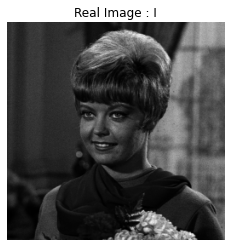

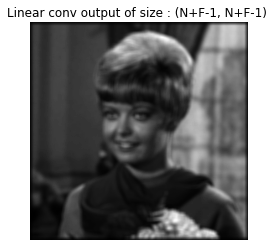

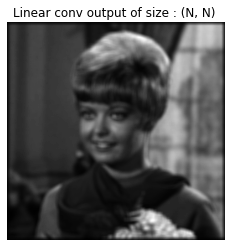

In [123]:
q2 = Q2(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")

### Definding the average filer:
f = 5
F = np.ones((f,f))/(f**2)

### Implementing linear conv
Image_avg_DFT,Image_avg_DFT_cropped = q2.linear_conv_with_DFT(q2.I, F)
q2.disp_img(Image_avg_DFT, title = "Linear conv output of size : (N+F-1, N+F-1) ")
q2.disp_img(Image_avg_DFT_cropped, title = "Linear conv output of size : (N, N) ")


###  Veryfying both procedures are equivalent .. By finding the difference of both avaeraged images

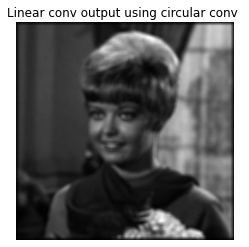

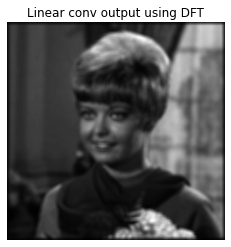

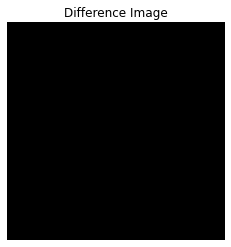

In [127]:
q2.disp_img(Image_avg_conv, title = "Linear conv output using circular conv ")
q2.disp_img(Image_avg_DFT, title = "Linear conv output using DFT")
q2.disp_img(Image_avg_DFT - Image_avg_conv, title = "Difference Image")

# Q3 : Image Denoising with linear filters.

In [180]:
### Code for Q2
class Q3(Q2): ### Adding Q2 and Q1 functions
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
        
    
   
    def __init__ (self, path, display = False, title = None):
        self.path = path
        self.I = cv2.imread(path,cv2.IMREAD_GRAYSCALE) ## Reading images..
        self.N = self.I.shape[0]
        if(display): ## Displaying I
            self.disp_img(self.I, title)
            
            
    ##############################  Adding noise ###########################
    
    def noise(self,I, mean, var):
        sig = var**0.5
        return np.random.normal(mean,sig,I.shape)
    
    ##############  Q 3.1 Moving Average Filter with size (M,M) #################3
    def MVA_filtering(self,I, M, display , title):
        F = np.ones((M,M))/(M*M)
        _, LDFT_cropped =  self.linear_conv_with_DFT(I,F)
        
        if(display): ## Displaying I
            self.disp_img(LDFT_cropped, title)
        return LDFT_cropped
    
    
    ################# Q 3.2 Gaussian filter of size M*M and std : sigma
    def gaussian_filtering (self,I, M,std, display, title):
        F = np.zeros((M,M))
        a = 1/(2*PI*((std)**2))
        for i in range(M):
            for j in range(M):
                F[i][j] = a* ( exp**(-1* ( (i**2 + j**2)/ (2*(std**2)) )  ) )

        _, LDFT_cropped =  self.linear_conv_with_DFT(I,F)
        
        if(display): ## Displaying I
            self.disp_img(LDFT_cropped, title)
        return LDFT_cropped
    


### Setup: Understanding what noise does to the image 

#### Observe that spurious pixels occur in the magnitude plot . and noisy pixels occur in the image

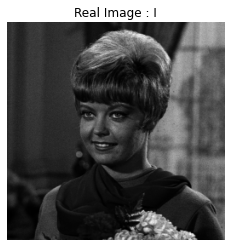

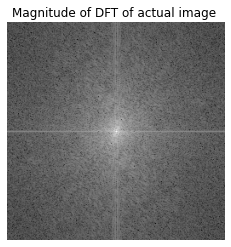

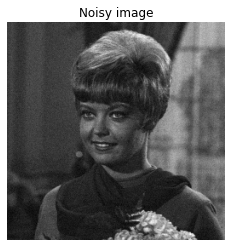

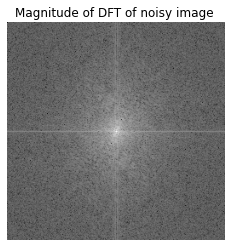

In [156]:
q3 = Q3(path = 'misc/4.1.01.tiff', display = True, title = "Real Image : I")

### Magnitude of real image ...
I_cap = q3.center_I_transform(q3.I)
DFT_I_cap = q3.find_DFT(I_cap) ## Centered DFT
_ = q3.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT of actual image ")




noise = q3.noise(q3.I, 0, 25) ### As specified in the question.
I_with_noise = q3.I + noise
q3.disp_img(I_with_noise, title = "Noisy image")
### Magnitude of noisy image ...
I_cap = q3.center_I_transform(I_with_noise)
DFT_I_cap = q3.find_DFT(I_cap) ## Centered DFT
_ = q3.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT of noisy image ")



### a) Added AWGN with zero mean and var = 25. Effect of Average filtering. Also displayed the magnitude of DFT of filtered image

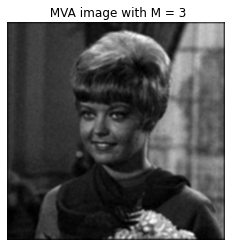

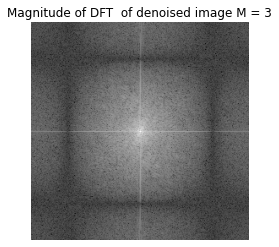

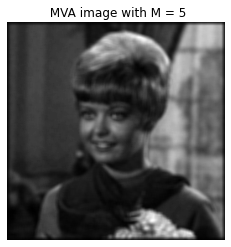

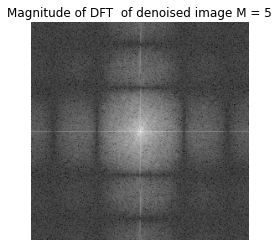

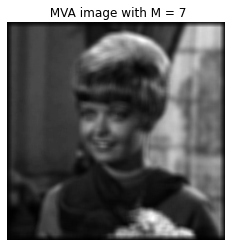

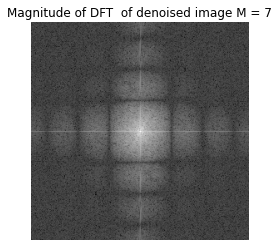

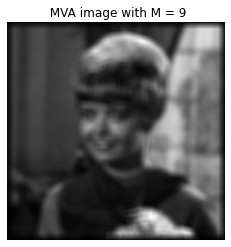

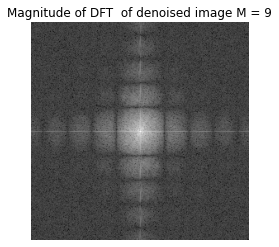

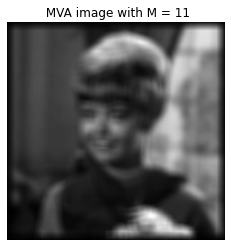

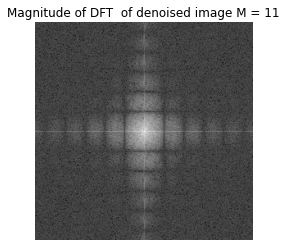

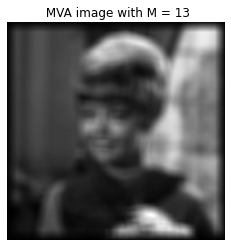

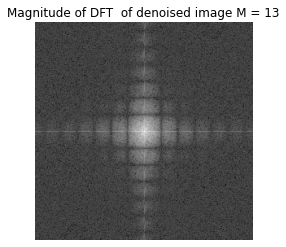

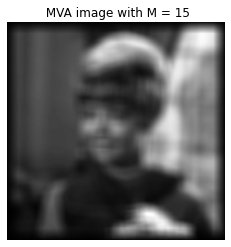

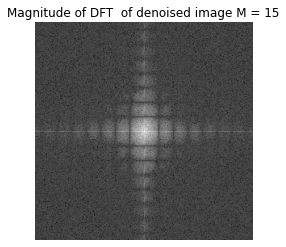

In [182]:

for i in range(3, 16, 2): ### a step size of 2
    title =' MVA image with M = ' + str(i) 
    I_denoised = q3.MVA_filtering(I_with_noise, M = i, display = True, title = title)
    
    I_cap = q3.center_I_transform(I_denoised)
    DFT_I_cap = q3.find_DFT(I_cap) ## Centered DFT
    _ = q3.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT  of denoised image M = " + str(i))
    

### b)  Gaussian filter with size 5*5  and varying var

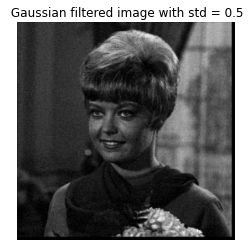

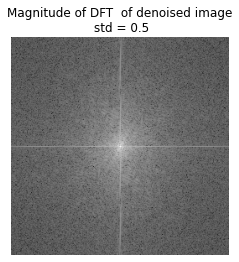

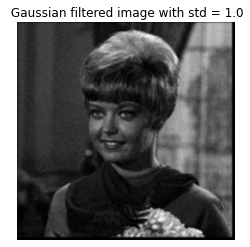

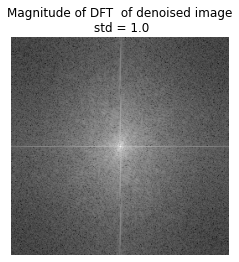

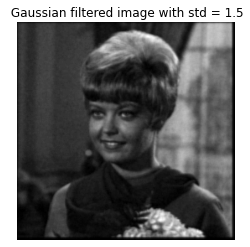

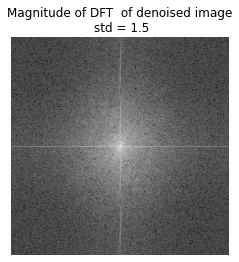

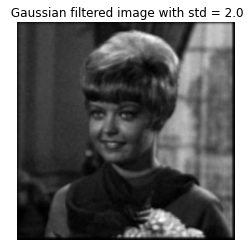

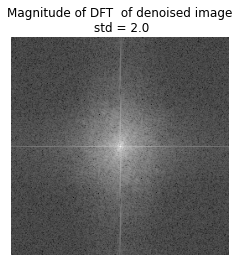

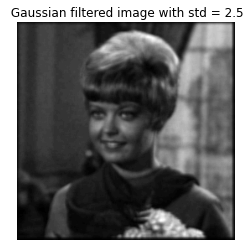

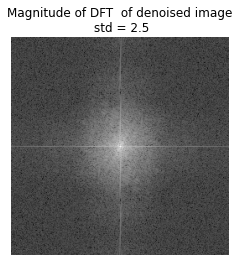

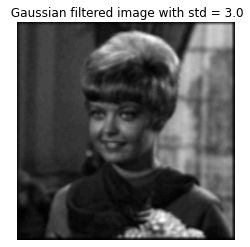

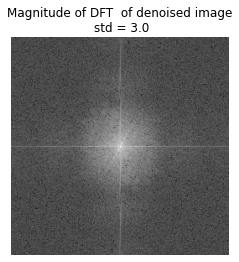

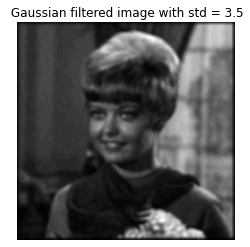

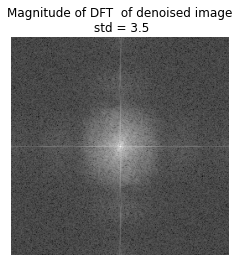

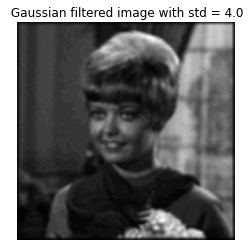

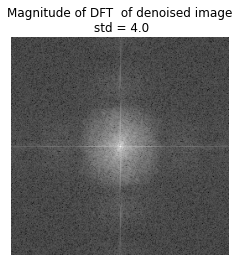

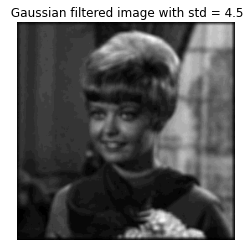

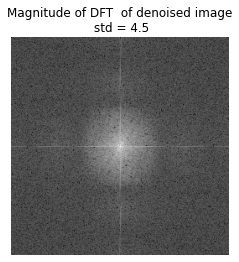

In [181]:
STD_values = np.arange(0.5,5, 0.5)

for std in STD_values: ### std step size of .5
    title =' Gaussian filtered image with std = ' + str(std) 
    I_denoised = q3.gaussian_filtering(I_with_noise, M = 5, std = std,  display = True, title = title)
    
    I_cap = q3.center_I_transform(I_denoised)
    DFT_I_cap = q3.find_DFT(I_cap) ## Centered DFT
    _ = q3.log_compressed_magnitude(DFT_I_cap, display = True, title = "Magnitude of DFT  of denoised image\n std = " + str(std))


# the end !